Premier Modèle IA (Régression linéaire simple, multiple et polynomiale)

Régression linéaire simple:

1- Utilisez les bibliothèques de Python pour récupérer le contenu du jeu de données.

In [1]:
import pandas as pd
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt

2- Récupération des données

In [2]:
dataset=pd.read_csv('reg_simple.csv')
dataset.head()

,heure_rev,note
0,2,10
1,3,12
2,4,20
3,5,22
4,6,21


3- Visualisation des données

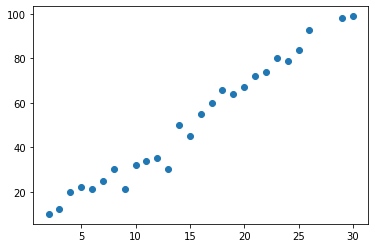

In [3]:
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, 1].values

plt.scatter(X,Y)

# plt.show()

4. Fractionnement le jeu de données en jeu d'entraînement et jeu de test (20% pour le test)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/5, random_state = 0)

5. Création du modèle (model(X,theta))

In [5]:
import numpy as np
f=[]
x0=dataset.note                      
x1=np.ones(len(Y))
x=np.column_stack((dataset.note, x1))
y=np.array(dataset.heure_rev)
y=y.reshape((len(Y),1))

# Génération aléatoire de a et b
theta = np.array(np.random.rand(x.shape[1], 1))
print('Theta original :',theta)
y.shape
print(len(Y))
print(Y)

# grad=(1/len(X))Xt(Xtheta-Y)

Theta original : [[0.62637091]
 [0.86178102]]
27
[10 12 20 22 21 25 30 21 32 34 35 30 50 45 55 60 66 64 67 72 74 80 79 84
 93 98 99]


[[0.282553  ]
 [0.85525687]]


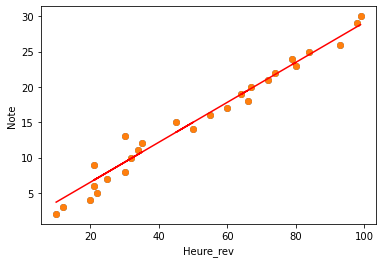

La fonction finale est : y= [0.28] x+ [0.86]


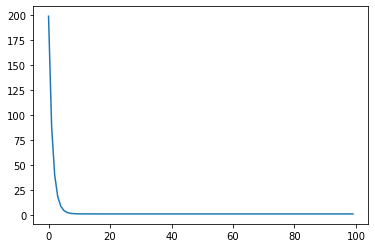

In [6]:
plt.figure(1)
plt.scatter(dataset.note,dataset.heure_rev)
plt.xlabel('Heure_rev')
plt.ylabel('Note')


def model(x,theta):
    f=np.dot(x,theta)
    return f
   

def fonction_cout(x,y,theta):
    m = len(y)
    return (1/(2*m)) * np.sum((model(x, theta) - y)**2)

def grad(x,y,theta):
    dJ=(1/len(y))*(x.T.dot(model(x,theta)-y))
     
    return(dJ)


def descente_gradient(x,y,theta,alpha,n_iterations):
    cout = np.zeros(n_iterations)
    for i in range (0,n_iterations):
        f=model(x,theta);
        # if i%10==0:
        #     plt.figure()
        #     plt.plot(x, model(x,theta), lw=0.5)
        cout[i] = fonction_cout(x, y, theta)
        theta = theta - alpha * grad(x,y,theta)
    return(theta, cout)

n_iterations = 100
learning_rate = 0.0001
 
theta_final, cost_history = descente_gradient(x, y, theta, learning_rate, n_iterations)
 
print(theta_final) # voici les parametres du modele une fois que la machine a été entrainée
 
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(x, theta_final)
 
# Affiche les résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.scatter(x0, y)
plt.plot(x0, predictions, c='r')
plt.show()
    

print("La fonction finale est : y=",theta_final[0].round(2),"x+",theta_final[1].round(2))
plt.plot(range(n_iterations), cost_history)
plt.show()

Régression multiple

1- Importez le jeu de données 'boston_house_prices.csv'

In [7]:
prices = pd.read_csv('boston_house_prices.csv')
prices.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


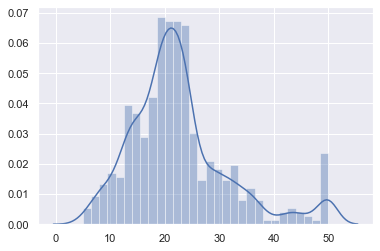

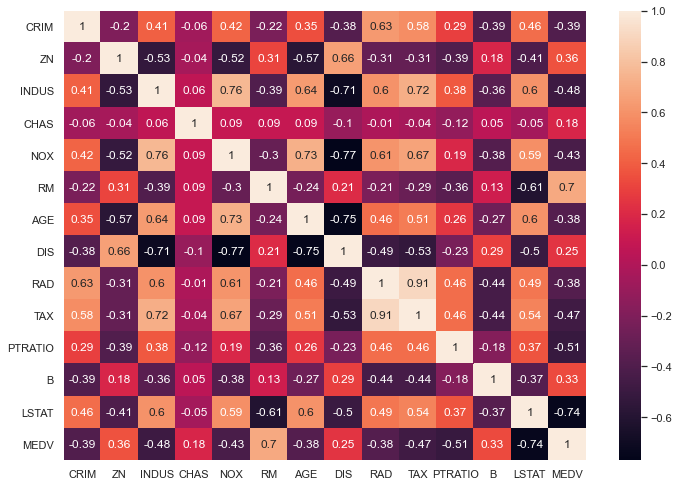

In [8]:
import seaborn as sns

y = prices.iloc[:,-1].values
plt.figure(5)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(y, bins=30)
plt.show()

correlation_matrix = prices.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)
#corr = data2.corr().mul(30).astype(int)
#cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)
#sns.clustermap(data=corr, annot=True, fmt='d',cmap = "Blues",annot_kws={"size": 16},)

In [9]:
x2=prices.iloc[:,5].values
x3=prices.iloc[:,12].values
x1=np.ones(len(prices))
x=np.column_stack((x2,x3,x1))


y=np.array(prices.MEDV)
y=y.reshape((len(y),1))
print(x.shape,y.shape)
print(x)

(506, 3) (506, 1)
[[6.575 4.98  1.   ]
 [6.421 9.14  1.   ]
 [7.185 4.03  1.   ]
 ...
 [6.976 5.64  1.   ]
 [6.794 6.48  1.   ]
 [6.03  7.88  1.   ]]


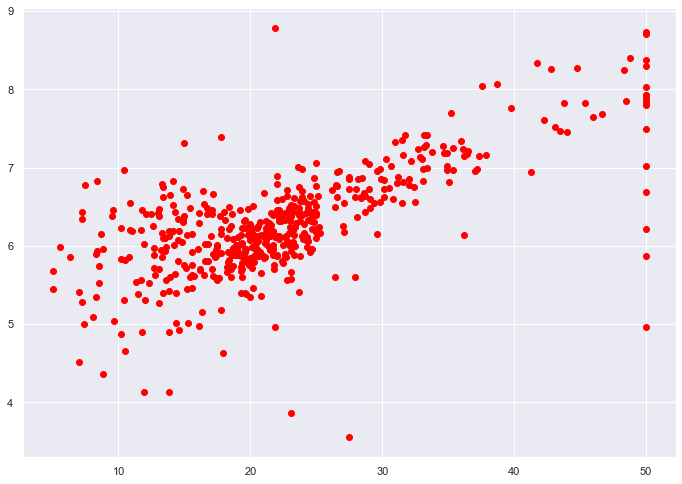

In [10]:
plt.scatter(y, x[:,0].reshape(-1, 1), c='red')
# plt.scatter(y,x[:,1], c='b')
# import re, seaborn as sns, numpy as np, pandas as pd, random
# from pylab import *
# from matplotlib.pyplot import plot, show, draw, figure, cm
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure(figsize=(6,6))
# ax = Axes3D(fig)
# ax.scatter(x2, x3, y, c='r', marker='v')

In [11]:
# Génération aléatoire de a,b et c

theta = np.array(np.random.rand(x.shape[1], 1))
print('Theta original :',theta)

from tqdm import tqdm
# Pas d'apprentissage
learning_rate=0.0007
n_iterations=600

theta_opt, cost_history=descente_gradient(x,y,theta,learning_rate,n_iterations)
# print("La fonction finale est : y= ",theta_opt[0].round(2),"x1 + ",theta_opt[1].round(2),"x2 + ",theta_opt[2])
print('Theta final :',theta_opt)

Theta original : [[0.53030731]
 [0.34204012]
 [0.55219916]]
Theta final : [[ 4.71247573]
 [-0.65135771]
 [ 1.11492083]]


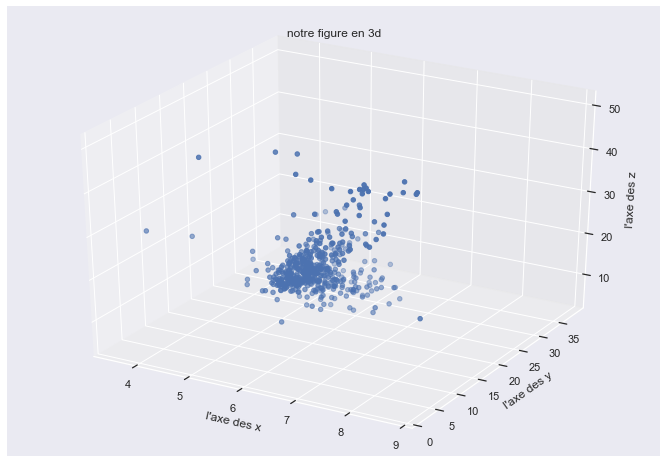

In [12]:
fig = plt.figure()

ax = fig.add_subplot(projection='3d')

ax.scatter(x2, x3, y, c='b')
ax.set_title("notre figure en 3d")
ax.set_xlabel("l'axe des x")
ax.set_ylabel("l'axe des y")
ax.set_zlabel("l'axe des z")
plt.show()

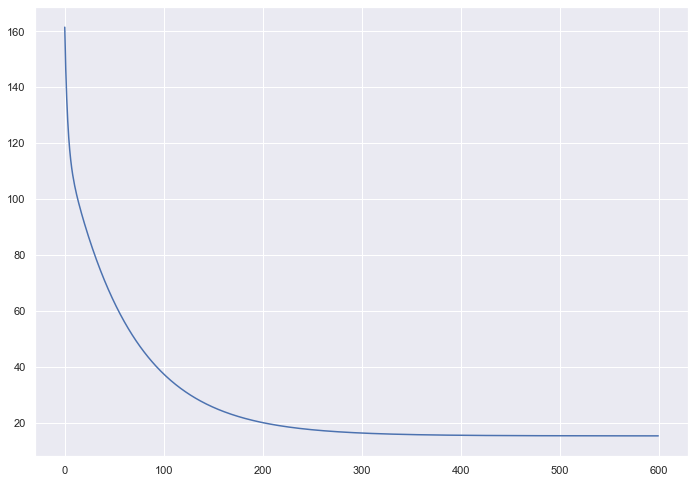

In [13]:
plt.plot(range(n_iterations), cost_history)
plt.show()

Régression Polynomiale :

In [14]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Project Analyste,1,45000
1,Ingenieur,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [15]:
y = dataset.iloc[:,2].values
y = y.reshape(y.shape[0],1)
y.shape

(10, 1)

In [16]:
x = dataset.iloc[:,1:2]
x.shape

(10, 1)

### Régression Linéaire Simple, Multiple et Polynomiale avec Scikit-Learn

#### Régression Linéaire Simple

1. Importez les bibliothéques necessaires

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

2. Importez le jeu de données 'reg_simple.csv'

In [18]:
dataset = pd.read_csv('reg_simple.csv')
dataset.head()

,heure_rev,note
0,2,10
1,3,12
2,4,20
3,5,22
4,6,21


3. Notre variable target (Y) est la note, Récupérer X et Y à partir du jeu de données

In [19]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

4. Fractionnement le jeu de données en jeu d'entraînement et jeu de test (20% pour le test)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/5, random_state = 0)

5. Créer votre modèle LinearRegression et entraînez le sur les données d'entraînement

In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

6. Predire les résultats du modèle sur l'ensemble du test

In [22]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

7. Visualisation des résultats du modèle sur les données d'entraînement

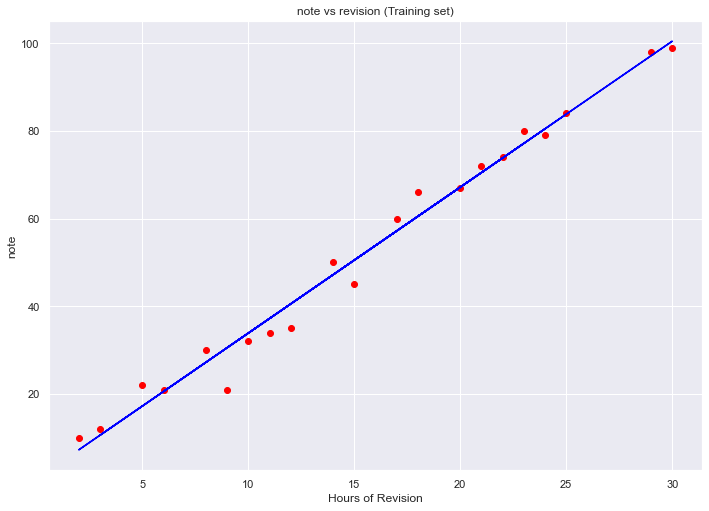

In [23]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('note vs revision (Training set)')
plt.xlabel('Hours of Revision')
plt.ylabel('note')
plt.show()

8. Visualisation des résultats du modèle sur les données de test

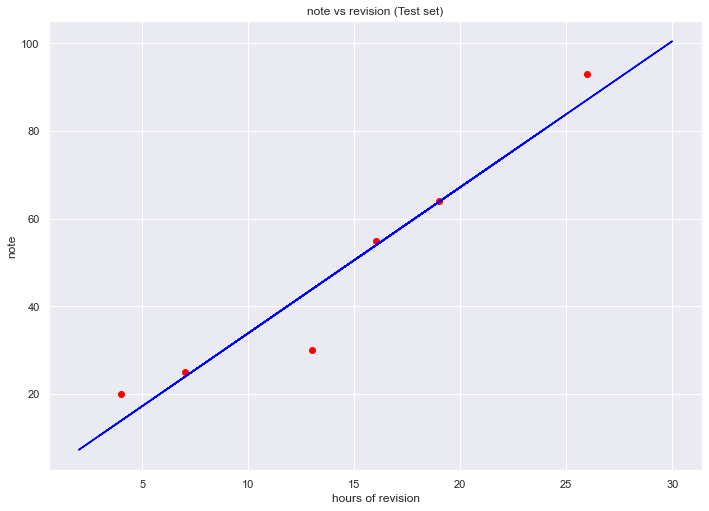

In [24]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('note vs revision (Test set)')
plt.xlabel('hours of revision')
plt.ylabel('note')
plt.show()

9. Evaluez votre modèle par le mean_squared_error et mean_absolute_error

In [25]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(mse)
print(mae)

44.37111207555747
4.705161854768154


Régression Linéaire Multiple

1. Importez le jeu de données 'boston_house_prices.csv'

In [26]:
dataset = pd.read_csv('boston_house_prices.csv')
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [27]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, :13].values
print(X.shape)

(506, 13)


3. Fractionnement le jeu de données en jeu d'entraînement et jeu de test (20% pour le test)¶

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

4. Standariser les variables d'entrainement et de test

In [29]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
# sc_y = StandardScaler()
# y_train = sc_y.fit_transform(y_train)

5. Créer votre modèle LinearRegression multiple et entraînez le sur les données d'entraînement

In [30]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

6. Predire les résultats du modèle sur l'ensemble du test

In [31]:
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

7. Evaluez votre modèle par le mean_squared_error

In [32]:
mse2 = mean_squared_error(y_test, y_pred_test)
print(mse2)

1.151302774378796e-25


Régression Polynomiale

1. Importez le jeu de données 'Position_Salaries.csv'

In [33]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Project Analyste,1,45000
1,Ingenieur,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


2. Notre variable target (Y) est le salaire, Récupérer X et Y à partir du jeu de données

In [34]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [35]:
y = dataset.iloc[:,2].values
y = y.reshape(y.shape[0],1)
y.shape

(10, 1)

In [36]:
X = dataset.iloc[:,1:2]
X.shape

(10, 1)

3. Fractionnement le jeu de données en jeu d'entraînement et jeu de test (20% pour le test)¶

In [37]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

4. Encoder les variables qualitatives

In [38]:
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# labelencoder = LabelEncoder()

# X[:, 1] = labelencoder.fit_transform(X[:, 1])
# print(X[:, 1])

4. Créer votre modèle LinearRegression et entraînez le sur le jeu de données

In [39]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

4. Visualisation des résultats du modèle LinearRegression sur le jeu de données

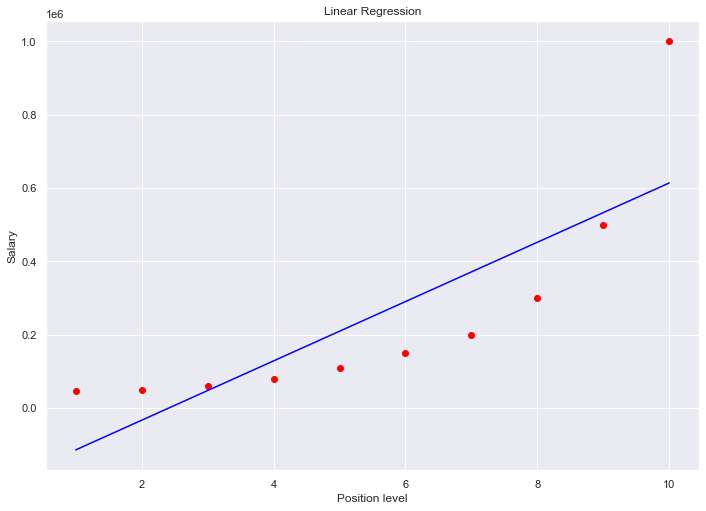

In [40]:
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


5. Créer votre modèle Regression polynomiale et entraînez le sur le jeu de données

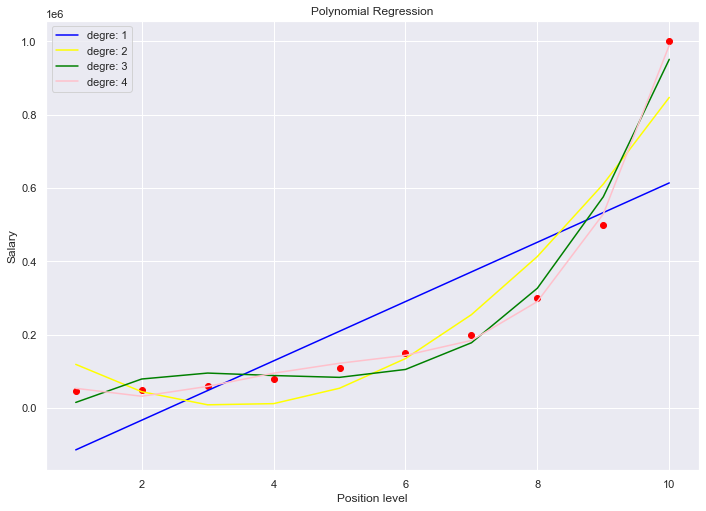

In [41]:
from sklearn.preprocessing import PolynomialFeatures

colors=['blue','yellow','green','pink','black']
plt.scatter(X, y, color = 'red')

# print(X)
# print(y)
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
for i in range(1,5):

    poly_reg = PolynomialFeatures(degree = i)
    X_poly = poly_reg.fit_transform(X)
    poly_reg.fit(X_poly, y)
    lin_reg_2 = LinearRegression()
    lin_reg_2.fit(X_poly, y)
    
    plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = colors[i-1],label='degre: %s' %i)
    
plt.legend()    
plt.show()

6. Faire la prédiction

In [42]:
valeur=np.array([6]).reshape(-1, 1)

# Predicting a new result with Linear Regression

print('Predicting a new result with Linear Regression')
print(lin_reg.predict(valeur))


print("=========================================================")
# Predicting a new result with Polynomial Regression

print('Predicting a new result with Polynomial Regression')
print(lin_reg_2.predict(poly_reg.fit_transform(valeur)))

Predicting a new result with Linear Regression
[[289939.39393939]]
Predicting a new result with Polynomial Regression
[[143275.05827508]]
